# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings("ignore")

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [94]:
df = pd.read_csv('marketing.csv')
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [95]:
df.shape

(2240, 27)

In [96]:
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [97]:
df.isnull().sum()/len(df)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [98]:
##filling the nan values 
df['Income'].fillna(0,inplace=True)
##df['Income'].fillna(df['Income'].mean(),inplace=True)

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [99]:
len(df[df.duplicated()])

0

### 5. Drop the columns which you think redundant for the analysis 

In [100]:
## dropping redundent columns
df=df.drop(columns=['ID','Dt_Customer'],axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0


### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [101]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [102]:
df['Marital_Status']=df['Marital_Status'].replace(['Married','Together'],'relationship')
df['Marital_Status']=df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone','Absurd','YOLO'],'Single')
df['Marital_Status'].unique()

array(['Single', 'relationship'], dtype=object)

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [103]:
df['Total_Expenses']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df['Total_Expenses'].unique()

array([1617,   27,  776, ..., 1679, 1341,  843], dtype=int64)

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [104]:
df['Num_Total_Purchases']=df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [105]:
df['Kids']=df['Kidhome']+df['Teenhome']

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [106]:
df['TotalAcceptedCmp']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']

### 11. Drop those columns which we have used above for obtaining new features

In [140]:
col_del=["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Kidhome","Teenhome","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases","NumWebVisitsMonth","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","Response"]
df=df.drop(columns=col_del,axis=1)
df.head()

KeyError: "['AcceptedCmp1' 'AcceptedCmp2' 'AcceptedCmp3' 'AcceptedCmp4'\n 'AcceptedCmp5' 'Kidhome' 'Teenhome' 'NumWebPurchases'\n 'NumCatalogPurchases' 'NumStorePurchases' 'NumDealsPurchases'\n 'NumWebVisitsMonth' 'MntWines' 'MntFruits' 'MntMeatProducts'\n 'MntFishProducts' 'MntSweetProducts' 'MntGoldProds' 'Response'] not found in axis"

### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [108]:
import datetime as dt
df['Age']=dt.datetime.today().year-df['Year_Birth']
df['Age']

0       65
1       68
2       57
3       38
4       41
        ..
2235    55
2236    76
2237    41
2238    66
2239    68
Name: Age, Length: 2240, dtype: int64

In [109]:
df.drop('Year_Birth',axis=1,inplace=True)

### 13. Encode the categorical variables in the dataset

In [110]:
##Lable encoding
cate=['Education','Marital_Status']
lbl_encode=LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

### 14. Standardize the columns, so that values are in a particular range

In [111]:
## Standardization
df1=df.copy()
scaled_features=StandardScaler().fit_transform(df1.values)
scaled_features_df=pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [112]:
## step1: calculate the covariance matrix
cov_matrix=np.cov(scaled_features.T)
cov_matrix

array([[ 1.00044663, -0.01375403,  0.11771325, -0.01173369, -0.05056252,
         0.09209518,  0.09405439,  0.05321304,  0.06327892,  0.17146685],
       [-0.01375403,  1.00044663,  0.00733686, -0.00450972, -0.00520466,
        -0.01775232,  0.00671037,  0.03917598, -0.06004206, -0.0042384 ],
       [ 0.11771325,  0.00733686,  1.00044663, -0.01060766, -0.02449955,
         0.65444582,  0.55599284, -0.29306798,  0.2845784 ,  0.15496032],
       [-0.01173369, -0.00450972, -0.01060766,  1.00044663,  0.01323699,
         0.02044173,  0.00574294,  0.01806145, -0.08900203,  0.01987996],
       [-0.05056252, -0.00520466, -0.02449955,  0.01323699,  1.00044663,
        -0.03707503, -0.02059185,  0.03108014, -0.01761676,  0.030141  ],
       [ 0.09209518, -0.01775232,  0.65444582,  0.02044173, -0.03707503,
         1.00044663,  0.75423984, -0.49911047,  0.4564099 ,  0.11135611],
       [ 0.09405439,  0.00671037,  0.55599284,  0.00574294, -0.02059185,
         0.75423984,  1.00044663, -0.24589955

In [113]:
## step2: calculate the eigen values and eigen vectores.
eig_vals,eig_vectors=np.linalg.eig(cov_matrix)
print('eigein vals: ','\n',eig_vals)
print('\n')
print('eigein vectors: ','\n',eig_vectors)

eigein vals:  
 [2.81832168 0.16418187 1.25529029 0.45623878 0.6876967  0.72121921
 0.83802954 1.05092024 0.99707934 1.01548864]


eigein vectors:  
 [[-9.64919451e-02  1.21819862e-02  5.45918378e-01 -4.96085996e-02
   6.27214138e-02  2.94180420e-01 -6.70516992e-01 -3.73289935e-01
   1.01311117e-01 -1.93536989e-02]
 [ 2.07094803e-02  4.04626962e-04  7.79288447e-02 -1.15743641e-02
   1.10758444e-01 -1.23580766e-01 -2.15678599e-01  2.67091077e-01
  -4.00566290e-01  8.29165961e-01]
 [-4.67890342e-01  1.59867576e-01  1.04591150e-01  8.09785032e-01
  -2.15059292e-01  1.55610115e-01  9.85771316e-02  6.95921609e-02
  -3.16827129e-02  5.29203027e-02]
 [ 1.41295729e-02  4.09056112e-02  1.20889369e-01  2.98565949e-02
   1.55775836e-02 -2.05343644e-01 -2.75569234e-01  6.79724756e-01
   6.33587671e-01 -2.85530044e-02]
 [ 3.28647094e-02 -6.61401941e-03  2.56498582e-02 -3.08603296e-03
  -1.01583481e-02  1.05462405e-01 -2.86542395e-01  4.80288798e-01
  -6.34027158e-01 -5.21736433e-01]
 [-5.54395785e-

In [114]:
##step3: scree plot
total=sum(eig_vals)
print(total)
var_exp=[(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print('Explained Variance: ',var_exp)
print('Cummulative Variance Explained:',cum_var_exp)

10.004466279589113
Explained Variance:  [28.170634973842933, 12.547298966680554, 10.50451081907671, 10.150352950403182, 9.966342103281859, 8.37655420329542, 7.208972335726338, 6.873896901058693, 4.560350993475002, 1.6410857531592917]
Cummulative Variance Explained: [ 28.17063497  40.71793394  51.22244476  61.37279771  71.33913981
  79.71569402  86.92466635  93.79856325  98.35891425 100.        ]


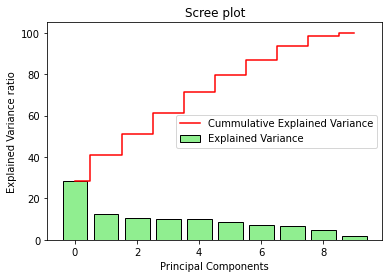

In [116]:
plt.bar(range(10),var_exp,align='center',color='lightgreen',edgecolor='black',label='Explained Variance')
plt.step(range(10),cum_var_exp,where='mid',color='red',label='Cummulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance ratio')
plt.title('Scree plot')
plt.legend(loc='best')
plt.show()

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [117]:
%%time
pca=PCA(n_components=8)
#scikit learn principal component analysis method

pca_df=pd.DataFrame(pca.fit_transform(scaled_features_df),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df.head()

Wall time: 4.06 ms


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.409286,-0.145633,0.176634,1.160515,-0.700555,0.858964,-0.114265,-0.646838
1,-1.677894,1.030720,-0.631461,1.211823,-0.154615,1.251105,-0.490570,0.083634
2,1.158116,-0.279747,0.106099,-0.809198,0.701802,0.730653,0.889931,-0.686179
3,-1.757075,-1.116103,-0.444667,-0.797761,0.580294,-0.325632,0.391134,0.050181
4,0.015191,0.587890,0.814185,-0.822850,-1.006053,-1.673209,0.779685,0.588829


In [118]:
pd.Series(pca.explained_variance_ratio_).cumsum()*100

0    28.170635
1    40.717934
2    51.222445
3    61.372798
4    71.339140
5    79.715694
6    86.924666
7    93.798563
dtype: float64

In [119]:
## finding optimal k value by Kmeans clustering using elbow plot
cluster_errors=[]
cluster_range=range(2,10)
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

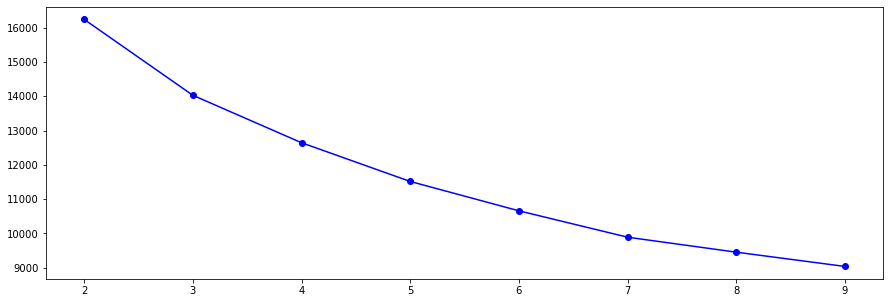

In [120]:
##creating a dataframe of number of clusters and cluster errors
cluster_df=pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})

##elbow plot
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

In [121]:
## applying KMeans clustering for  the optimal number of cluster obtained above.
kmeans = KMeans(n_clusters=3,random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [122]:
## creating a dataframe of the labels
label = pd.DataFrame(kmeans.labels_,columns=['Label'])

In [123]:
df['Label']=label

In [124]:
df

,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age,Label
0,2,0,58138.0,58,0,1617,25,0,1,65,0
1,2,0,46344.0,38,0,27,6,2,0,68,2
2,2,1,71613.0,26,0,776,21,0,0,57,0
3,2,1,26646.0,26,0,53,8,1,0,38,2
4,4,1,58293.0,94,0,422,19,1,0,41,2
...,...,...,...,...,...,...,...,...,...,...,...
2235,2,1,61223.0,46,0,1341,18,1,0,55,0
2236,4,1,64014.0,56,0,444,22,3,1,76,0
2237,2,0,56981.0,91,0,1241,19,0,1,41,0
2238,3,1,69245.0,8,0,843,23,1,0,66,0


In [129]:
df['Label'].value_counts(normalize=True)

2    0.552679
0    0.437946
1    0.009375
Name: Label, dtype: float64

In [130]:
df[df['Label']==2]['Income'].mean()

36415.401453957995

In [131]:
df[df['Label']==1]['Income'].mean()

45242.28571428572

In [132]:
df[df['Label']==0]['Income'].mean()

71098.4240570846

In [136]:
## joining the label dataframe to sca_df dataframe
kmeans_df=pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,2.409286,-0.145633,0.176634,1.160515,-0.700555,0.858964,-0.114265,-0.646838,0
1,-1.677894,1.030720,-0.631461,1.211823,-0.154615,1.251105,-0.490570,0.083634,2
2,1.158116,-0.279747,0.106099,-0.809198,0.701802,0.730653,0.889931,-0.686179,0
3,-1.757075,-1.116103,-0.444667,-0.797761,0.580294,-0.325632,0.391134,0.050181,2
4,0.015191,0.587890,0.814185,-0.822850,-1.006053,-1.673209,0.779685,0.588829,2


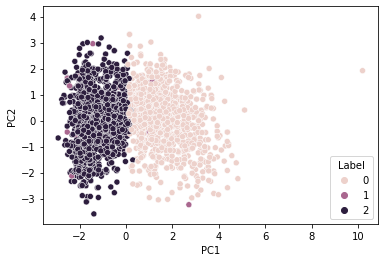

In [138]:
## visualizing the clusters formed
sns.scatterplot(kmeans_df['PC1'],kmeans_df['PC2'],hue='Label',data=kmeans_df)
plt.show()

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

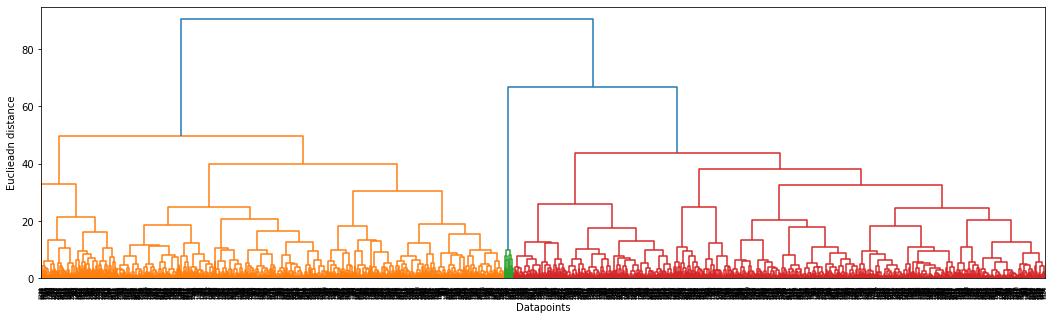

In [139]:
plt.figure(figsize=[18,5])
merg=linkage(scaled_features,method='ward')
dendrogram(merg,leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclieadn distance')
plt.show()

In [142]:
from sklearn.metrics import silhouette_score

In [143]:
for i in range(2,15):
    hier=AgglomerativeClustering(n_clusters=i)
    hier=hier.fit(scaled_features_df)
    labels=hier.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df,labels))

2 0.18666430708553308
3 0.1973146792861753
4 0.17310425446094566
5 0.12841155606993263
6 0.12402769225396852
7 0.13579048528519633
8 0.13688531467677478
9 0.11811070922990781
10 0.11862661585433812
11 0.12129967171561239
12 0.11627278232377891
13 0.12121667108672829
14 0.11679818224856578


#### -we can observe from the above dendrogram and as well as the silhoutte scores for different clusters, the highest silhoutte score is for clusters 3.
#### -Lets choose k=3  as the optimal cluster size and builtd a agglomerative clustering model  using the original scaled dataset

In [144]:
## Building hierarchical clustering model using the optimal clusters as 3 using original data
hie_cluster= AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hie_cluster_model=hie_cluster.fit(scaled_features_df)

In [150]:
## Creating  a dataframe of the labels
df_label1=pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,0
1,1
2,0
3,1
4,0


In [155]:
## joining the label dataframe with unscaled initial cleaned dataframe.(dfc)

df_hier=df.join(df_label1)
df_hier.head()

,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age,Label,Labels
0,2,0,58138.0,58,0,1617,25,0,1,65,0,0
1,2,0,46344.0,38,0,27,6,2,0,68,2,1
2,2,1,71613.0,26,0,776,21,0,0,57,0,0
3,2,1,26646.0,26,0,53,8,1,0,38,2,1
4,4,1,58293.0,94,0,422,19,1,0,41,2,0


### Visualization and Interpretation of results

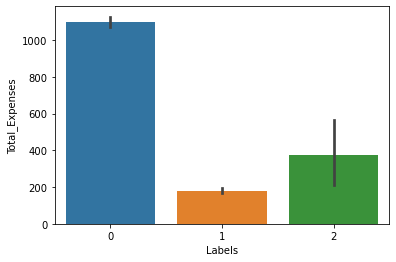

In [156]:
sns.barplot(df_hier['Labels'],df_hier['Total_Expenses'])
plt.show()

#### - The total_expense is much higer for cluster 0 compared to the clusters 1 and 2

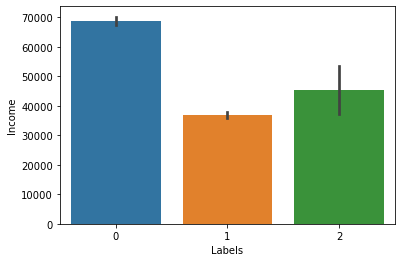

In [157]:
sns.barplot(df_hier['Labels'],df_hier['Income'])
plt.show()

#### - Where as the income is also higer for the cluster 0 followed by cluster 2

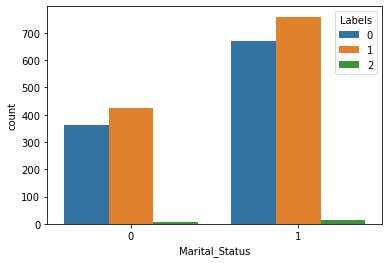

In [158]:
sns.countplot(df_hier['Marital_Status'],hue='Labels',data=df_hier)
plt.show()

#### - We can observe that the most of the customers who are in a relationship falls under cluster 0

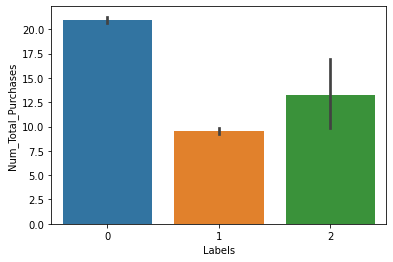

In [159]:
sns.barplot(df_hier['Labels'],df_hier['Num_Total_Purchases'])
plt.show()

#### - The total number of purchases is also much higher for customers from cluster 0 compared to cluster 1 and 2
#### - We can conclude that the customers belong to cluster 0 does maximum purches, has spend maximum amount and have maximum income.
#### - Where customers belong to cluster 1 has the least total_expenses , minimum balance and does minimum purchases compared t other two clusters.
#### - Customers belong to cluster 2 does average purchases , has average income